# Employee Group Project 23

##### By Tracy Gan, Aronn Laurel, Nikita Prabhu, Nolan Vu


### Data Description

The Employee dataset contains information about the employees in the company, including their personal information such as age, gender, educational background, years of experience, salary tier, and the city where they work. The dataset also contains their information in regards to the company, such as the year they joined, and if they were ever benched. Specifically, each variable is broken down into

| Variable Name     | Type of Variable | Description |
|-------------------|------------------|-------------|
| Education         | Categorical  | It represents the educational qualities of employees. There are three unique levels for this categorical variable, which are Bachelors, Masters, and PHD.   |
| JoiningYear       | Categorical  | It represents the year each employee joined the company, which also indicates the length of their service to the company.  |
| City              | Categorical  | It represents the city where the employee works at. There are three unique values for this categorical variable, which are Bangalore, Pune, New Delhi.      |
| PaymentTier         | INSERT  | INSERT   |
| Age       | INSERT  | INSERT  |
| Gender              | INSERT  |INSERT  |
| EverBenched         | INSERT  | INSERT    |
| ExperienceInCurrentDomain       |  INSERT |INSERT  |
| LeaveOrNot              | INSERT  | INSERT     |

In total, there are 4653 rows of data for each column, where there are no missing values for any of the variables. This Employee dataset, found on Kaggle, came from the contributions of a HR department of a company, of which is anonymized as well as the people who contribute to this dataset. 

### Question

With this dataset, we are interested in mainly two questions. 
1. Can age, the year they joined and their payment tier be used to predict whether an employee would leave the company?
2. Does education, gender and experience in the current domain affect the payment tier?

Hence, we will conduct some exploratory data analysis and visualisation to answer our questions.

In [8]:
# Firstly, we will load some libraries so that we can perform data analysis and visualisation to answer our question.

# Loading Libraries
library(tidymodels)
library(tidyverse)
library(dplyr)
library(forcats)
library(ggplot2)

In [13]:
employee_data <- read_csv('data/Employee.csv')
head(employee_data)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


Overall our data does not have any missing values, nor is there inconsistency within our dataset. Hence, the cleaning and wrangling of the dataset will focus on removing variables that we are not interested in as well as conducting appropriate encoding techniques for our categorical variables.

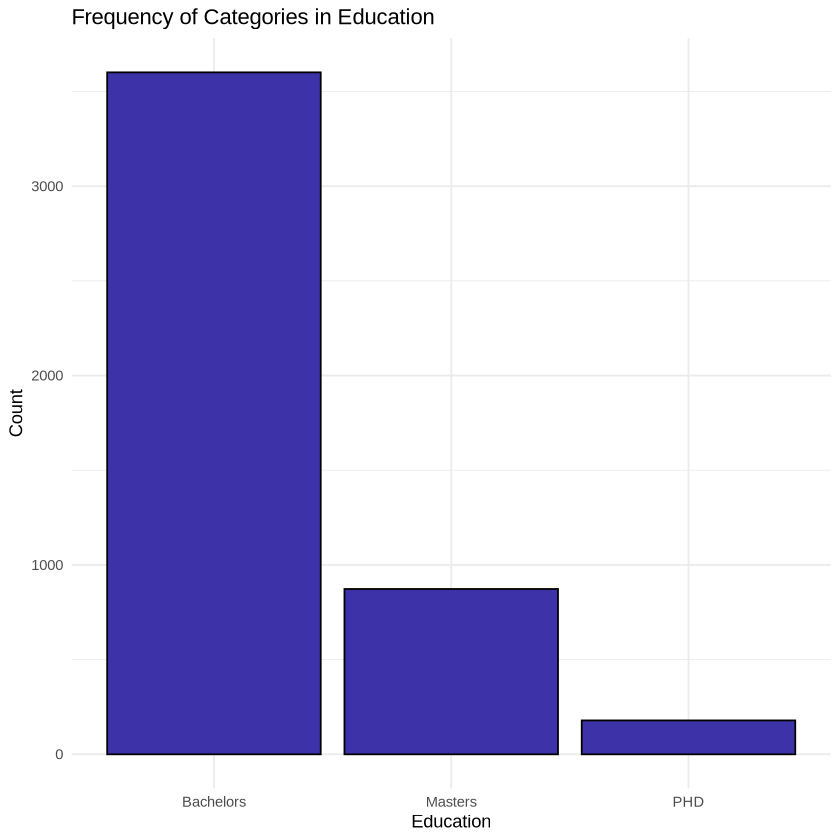

In [14]:
ggplot(employee_data, aes(x = Education)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Education",
       x = "Education",
       y = "Count") +
  theme_minimal()

For Education, we can use Ordinal Encoding on it as it does represent an increasing order as we go from Bachelors, Masters to PHD.

In [15]:
employee_data <- employee_data |>
                mutate(Education = fct_relevel(Education, "Bachelors", "Masters", "PHD"),
                      Education = as.numeric(Education))
head(employee_data)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,2017,Bangalore,3,34,Male,No,0,0
1,2013,Pune,1,28,Female,No,3,1
1,2014,New Delhi,3,38,Female,No,2,0
2,2016,Bangalore,3,27,Male,No,5,1
2,2017,Pune,3,24,Male,Yes,2,1
1,2016,Bangalore,3,22,Male,No,0,0
